<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/ABCD_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

## Instalando e importando as bibliotecas

In [ ]:
! pip install -qq control sympy

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [ ]:
# Ajustando o tamanho da fonte de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 25px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

# Convertendo um espaço de estados em uma função de transferência

Um modelo em espaço de estados pode ser convertido para uma função de transferência (ou matriz de transferência). Caso você tenha instalado a biblioteca Slycot (dependência obrigatória para sistemas MIMO), poderá converter diretamente um modelo em espaço de estados para a forma de uma matriz de transferência, usando G = tf(sys) onde sys é uma representação em espaço de estados.

No Google Colab, ainda não é possível utilizar a biblioteca Slycot. A conversão pode ser feita usando uma programação com a biblioteca Sympy. Aqui abaixo, estão duas funções simples escritas pelo professor para facilitar o trabalho nesta disciplina.


A função `ABCD_to_tf(A, B, C, D)` é utilizada para manipulação simbólica e algébrica, convertendo um espaço de estados dado pelas matrizes `A`, `B`, `C` e `D` em uma matriz simbólica de funções de transferência, \( **G**(s) \). Em seguida, a função `get_tf(g_exp)` extrai os coeficientes do numerador e do denominador de uma função de transferência simbólica, `g_exp`, e converte-a para uma função de transferência numérica, a qual pode ser usada para extrair propriedades do sistema.


In [ ]:
from sympy import symbols, Poly, eye

def ABCD_to_tf(A,B,C,D):
    '''  É utilizada para manipulação simbólica e algébrica para converter um espaço
    de estados dado por (A, B, C, D) para uma matriz de funções de  transferência
    no domínio de Laplace.'''
    s = symbols('s')
    n = A.shape[0]
    G = C*(s*eye(n) - A).inv()*B + D
    return G.as_immutable()

def get_tf(g_exp):
    '''Extrai os coeficiente do numerador e do denominador de uma função de transferência
    simbólica e converte para um função de transferências numérica, a qual pode ser usada
    para extrair propriedades dos sistema.'''
    num, den = g_exp.as_numer_denom()
    num_float = [float(i) for i in Poly(num).all_coeffs()]
    den_float = [float(i) for i in Poly(den).all_coeffs()]
    den_ = den_float[-1]
    return ct.tf(np.array(num_float)/den_,
                 np.array(den_float)/den_)


In [ ]:
# Especificar o modelo em espaço de estados (exemplo)
A = np.array([[-1.14 , -0.01 ],
              [29.332, -0.947]])
B = np.array([[0.001, 1.   , 0.   ],
              [0.255, 0.   , 2.092]])
C = np.array([[1., 0.],
              [0., 1.]])
D = np.array([[0., 0., 0.],
              [0., 0., 0.]])

sys = ct.ss(A,B,C,D)

sys

StateSpace(array([[-1.1400e+00, -1.0000e-02],
       [ 2.9332e+01, -9.4700e-01]]), array([[1.000e-03, 1.000e+00, 0.000e+00],
       [2.550e-01, 0.000e+00, 2.092e+00]]), array([[1., 0.],
       [0., 1.]]), array([[0., 0., 0.],
       [0., 0., 0.]]))

In [ ]:
G = ABCD_to_tf(A,B,C,D) # fornece a matriz de funções de transferência
G.simplify()

Matrix([
[(0.001*s - 0.001603)/(1.0*s**2 + 2.087*s + 1.3729), (1.0*s + 0.947)/(1.0*s**2 + 2.087*s + 1.3729),            -0.02092/(1.0*s**2 + 2.087*s + 1.3729)],
[(0.255*s + 0.320032)/(1.0*s**2 + 2.087*s + 1.3729),          29.332/(1.0*s**2 + 2.087*s + 1.3729), (2.092*s + 2.38488)/(1.0*s**2 + 2.087*s + 1.3729)]])

In [ ]:
Gp = get_tf(G[0,1])
Gp

TransferFunction(array([0.72838517, 0.68978076]), array([0.72838517, 1.52013985, 1.        ]))

In [ ]:
Gp.dcgain()

0.6897807560638066

In [ ]:
Gp.poles()

array([-1.0435+0.53292378j, -1.0435-0.53292378j])

In [ ]:
Gp.zeros()

array([-0.947+0.j])

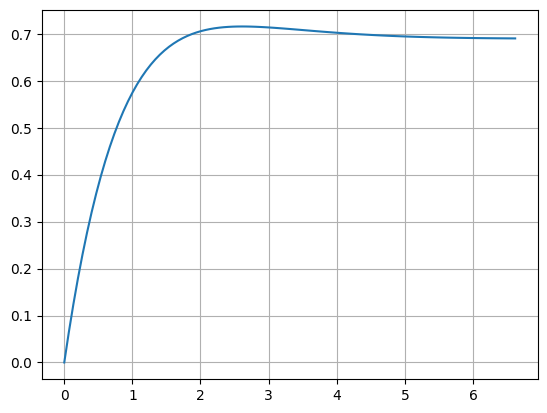

In [ ]:
t, y = ct.step_response(Gp)
plt.plot(t,y);
plt.grid();